In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import nltk

In [2]:
from matplotlib.pyplot import imread

In [3]:
from wordcloud import WordCloud

#### Read/**Load** **Data**

In [5]:
tweet=pd.read_csv('/content/Elon_musk.csv', encoding='cp1252')

In [6]:
tweet

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


#Number of Words in single **tweet**

In [7]:
tweet['word_count'] = tweet['Text'].apply(lambda x: len(str(x).split(" ")))
tweet[['Text','word_count']].head()

,Text,word_count
0,@kunalb11 I’m an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


#Number of characters in single tweet

In [8]:
tweet['char_count'] = tweet['Text'].str.len() ## this also includes spaces
tweet[['Text','char_count']].head()

,Text,char_count
0,@kunalb11 I’m an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


# Average word length

In [9]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

tweet['avg_word'] = tweet['Text'].apply(lambda x: avg_word(x))
tweet[['Text','avg_word']].head()

,Text,avg_word
0,@kunalb11 I’m an alien,4.750000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5.384615
2,@joerogan @Spotify Great interview!,8.000000
3,@gtera27 Doge is underestimated,7.000000
4,@teslacn Congratulations Tesla China for amazi...,5.176471


In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
from nltk.corpus import stopwords

# number of stopwords

In [12]:
stop = stopwords.words('english')

tweet['stopwords'] = tweet['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
tweet[['Text','stopwords']].head()

,Text,stopwords
0,@kunalb11 I’m an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5


# number of special character

In [13]:
tweet['hastags'] = tweet['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
tweet[['Text','hastags']].head()

,Text,hastags
0,@kunalb11 I’m an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,2
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1


# number of numberics

In [14]:
tweet['numerics'] = tweet['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
tweet[['Text','numerics']].head()

,Text,numerics
0,@kunalb11 I’m an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


# number of uppercase words

In [15]:
tweet['upper'] = tweet['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
tweet[['Text','upper']].head()

,Text,upper
0,@kunalb11 I’m an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


# Pre-processing

# Lower case

In [16]:
tweet['Text'] = tweet['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
tweet['Text'].head()

0                               @kunalb11 i’m an alien
1    @id_aa_carmack ray tracing on cyberpunk with h...
2                  @joerogan @spotify great interview!
3                      @gtera27 doge is underestimated
4    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

# Removing Punctuation

In [17]:
tweet['Text'] = tweet['Text'].str.replace('[^\w\s]','')
tweet['Text'].head()

<ipython-input-17-c621d882faac>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet['Text'] = tweet['Text'].str.replace('[^\w\s]','')


0                                 kunalb11 im an alien
1    id_aa_carmack ray tracing on cyberpunk with hd...
2                     joerogan spotify great interview
3                       gtera27 doge is underestimated
4    teslacn congratulations tesla china for amazin...
Name: Text, dtype: object

# Removal of stop words

In [18]:
stop = stopwords.words('english')
tweet['Text'] = tweet['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
tweet['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Text, dtype: object

# Common word removal

In [19]:
freq = pd.Series(' '.join(tweet['Text']).split()).value_counts()[:10]
freq

spacex            239
amp               218
tesla             166
erdayastronaut    142
rt                127
ppathole          123
flcnhvy           114
yes                86
great              76
teslaownerssv      73
dtype: int64

In [20]:
freq = list(freq.index)
tweet['Text'] = tweet['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
tweet['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

#Rare word removal

In [21]:
freq = pd.Series(' '.join(tweet['Text']).split()).value_counts()[-10:]
freq

nyquil                1
musk                  1
negati                1
httpstco6ohta09s5l    1
carousel              1
joeingeneral          1
andrewbogut           1
typical               1
unusual               1
altho                 1
dtype: int64

In [22]:
freq = list(freq.index)
tweet['Text'] = tweet['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
tweet['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

# Spelling correction

In [23]:
from textblob import TextBlob

In [24]:
tweet['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                    kunalb11 in alien
1    id_aa_carmack ray tracing cyberpunk her nextle...
2                           joerogan specify interview
3                          gtera27 done underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

In [51]:
# Joining the list into one string/text
text = ' '.join(tweet)
text

'Unnamed: 0 Text word_count char_count avg_word stopwords hastags numerics upper sentiment'

'Unnamed: 0 Text word_count char_count avg_word stopwords hastags numerics upper sentiment'

# Tokenization

In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
TextBlob(tweet['Text'][1]).words

WordList(['id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried'])

### Stemming

In [28]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
tweet['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                    kunalb11 im alien
1    id_aa_carmack ray trace cyberpunk hdr nextleve...
2                           joerogan spotifi interview
3                              gtera27 doge underestim
4    teslacn congratul china amaz execut last year ...
Name: Text, dtype: object

# Lemmatization

In [29]:
from textblob import Word

In [30]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [31]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [32]:
tweet['Text'] = tweet['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
tweet['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulation china amazing execution...
Name: Text, dtype: object

#Advanced Text Processing

#N-grams

In [35]:
TextBlob(tweet['Text'][0]).ngrams(2)

[WordList(['kunalb11', 'im']), WordList(['im', 'alien'])]

# Term Frequency

In [36]:
tf1 = (tweet['Text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,id_aa_carmack,1
1,ray,1
2,tracing,1
3,cyberpunk,1
4,hdr,1
5,nextlevel,1
6,tried,1


# Inverse Document Frequency

In [37]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(tweet.shape[0]/(len(tweet[tweet['Text'].str.contains(word)])))

tf1

,words,tf,idf
0,id_aa_carmack,1,4.166415
1,ray,1,5.035453
2,tracing,1,7.600402
3,cyberpunk,1,5.115496
4,hdr,1,6.907255
5,nextlevel,1,6.907255
6,tried,1,5.808643


# Term Frequency – Inverse Document Frequency (TF-IDF)

In [38]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,id_aa_carmack,1,4.166415,4.166415
1,ray,1,5.035453,5.035453
2,tracing,1,7.600402,7.600402
3,cyberpunk,1,5.115496,5.115496
4,hdr,1,6.907255,6.907255
5,nextlevel,1,6.907255,6.907255
6,tried,1,5.808643,5.808643


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
vect = tfidf.fit_transform(tweet['Text'])
vect

<1999x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 7374 stored elements in Compressed Sparse Row format>

# Bag of words

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(tweet['Text'])
data_bow

<1999x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 8020 stored elements in Compressed Sparse Row format>

# Sentiment Analysis

In [42]:
tweet['Text'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                 (-0.25, 0.75)
1                                    (0.0, 0.0)
2                                    (0.0, 0.0)
3                                    (0.0, 0.0)
4    (0.20000000000000004, 0.32222222222222224)
Name: Text, dtype: object

In [43]:
tweet['sentiment'] = tweet['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
tweet[['Text','sentiment']].head()

,Text,sentiment
0,kunalb11 im alien,-0.25
1,id_aa_carmack ray tracing cyberpunk hdr nextle...,0.00
2,joerogan spotify interview,0.00
3,gtera27 doge underestimated,0.00
4,teslacn congratulation china amazing execution...,0.20


# Generate Wordcloud

In [44]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

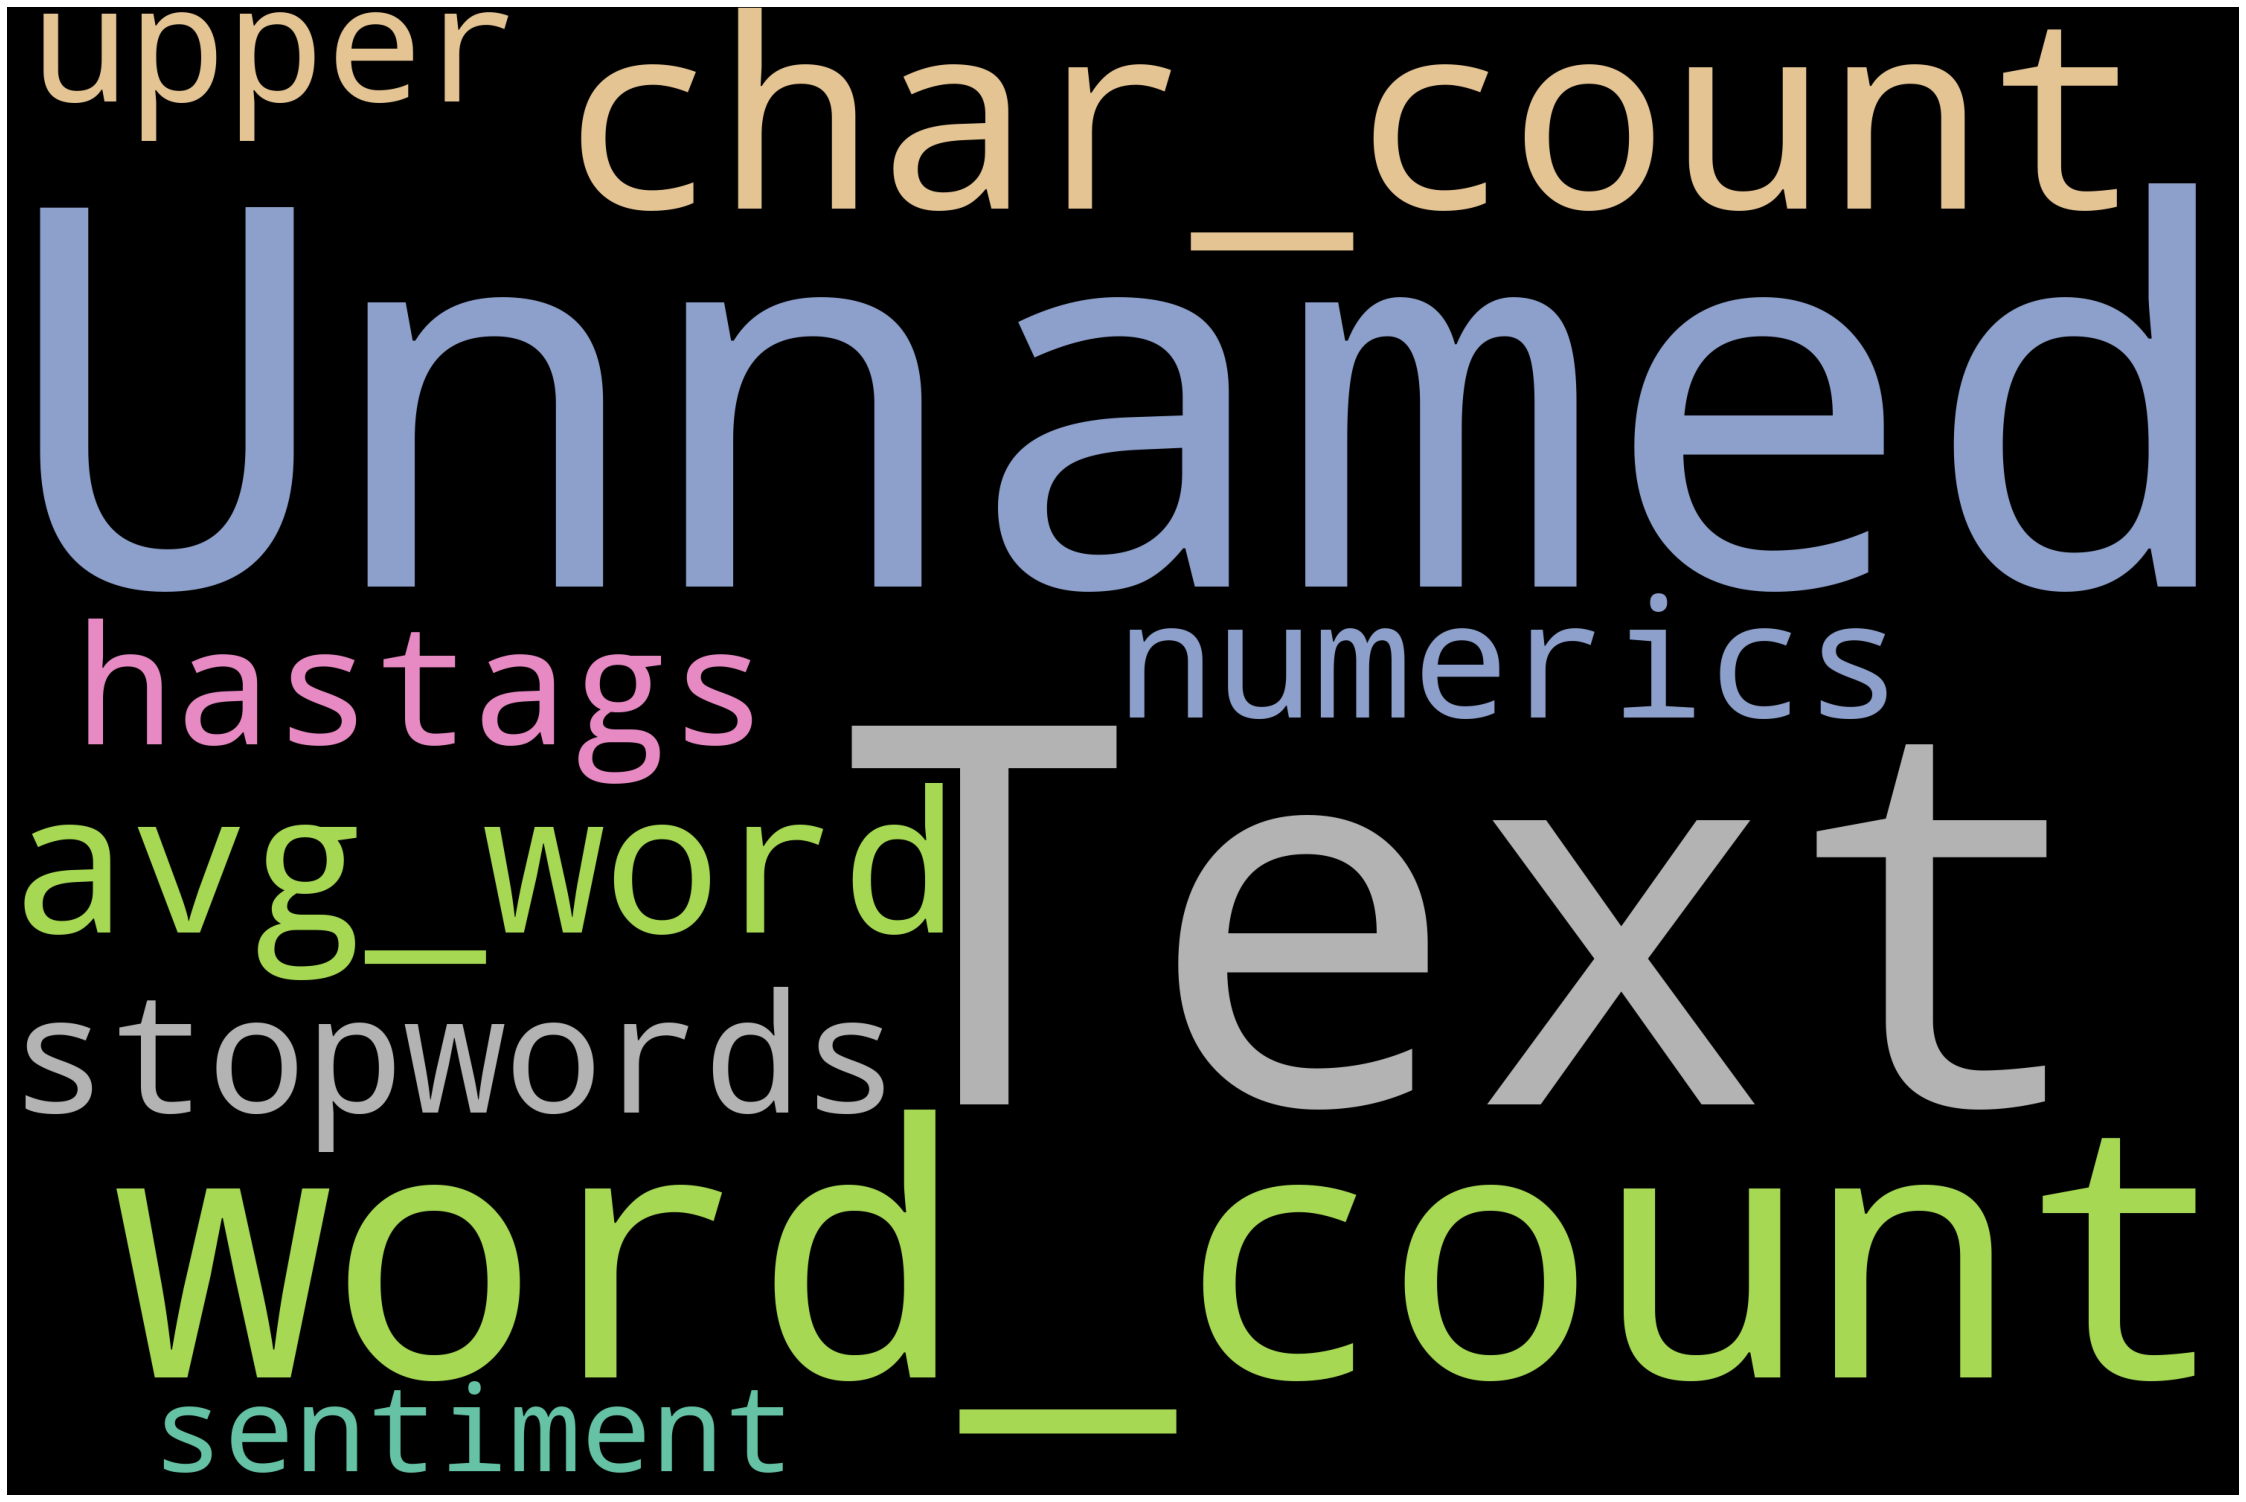

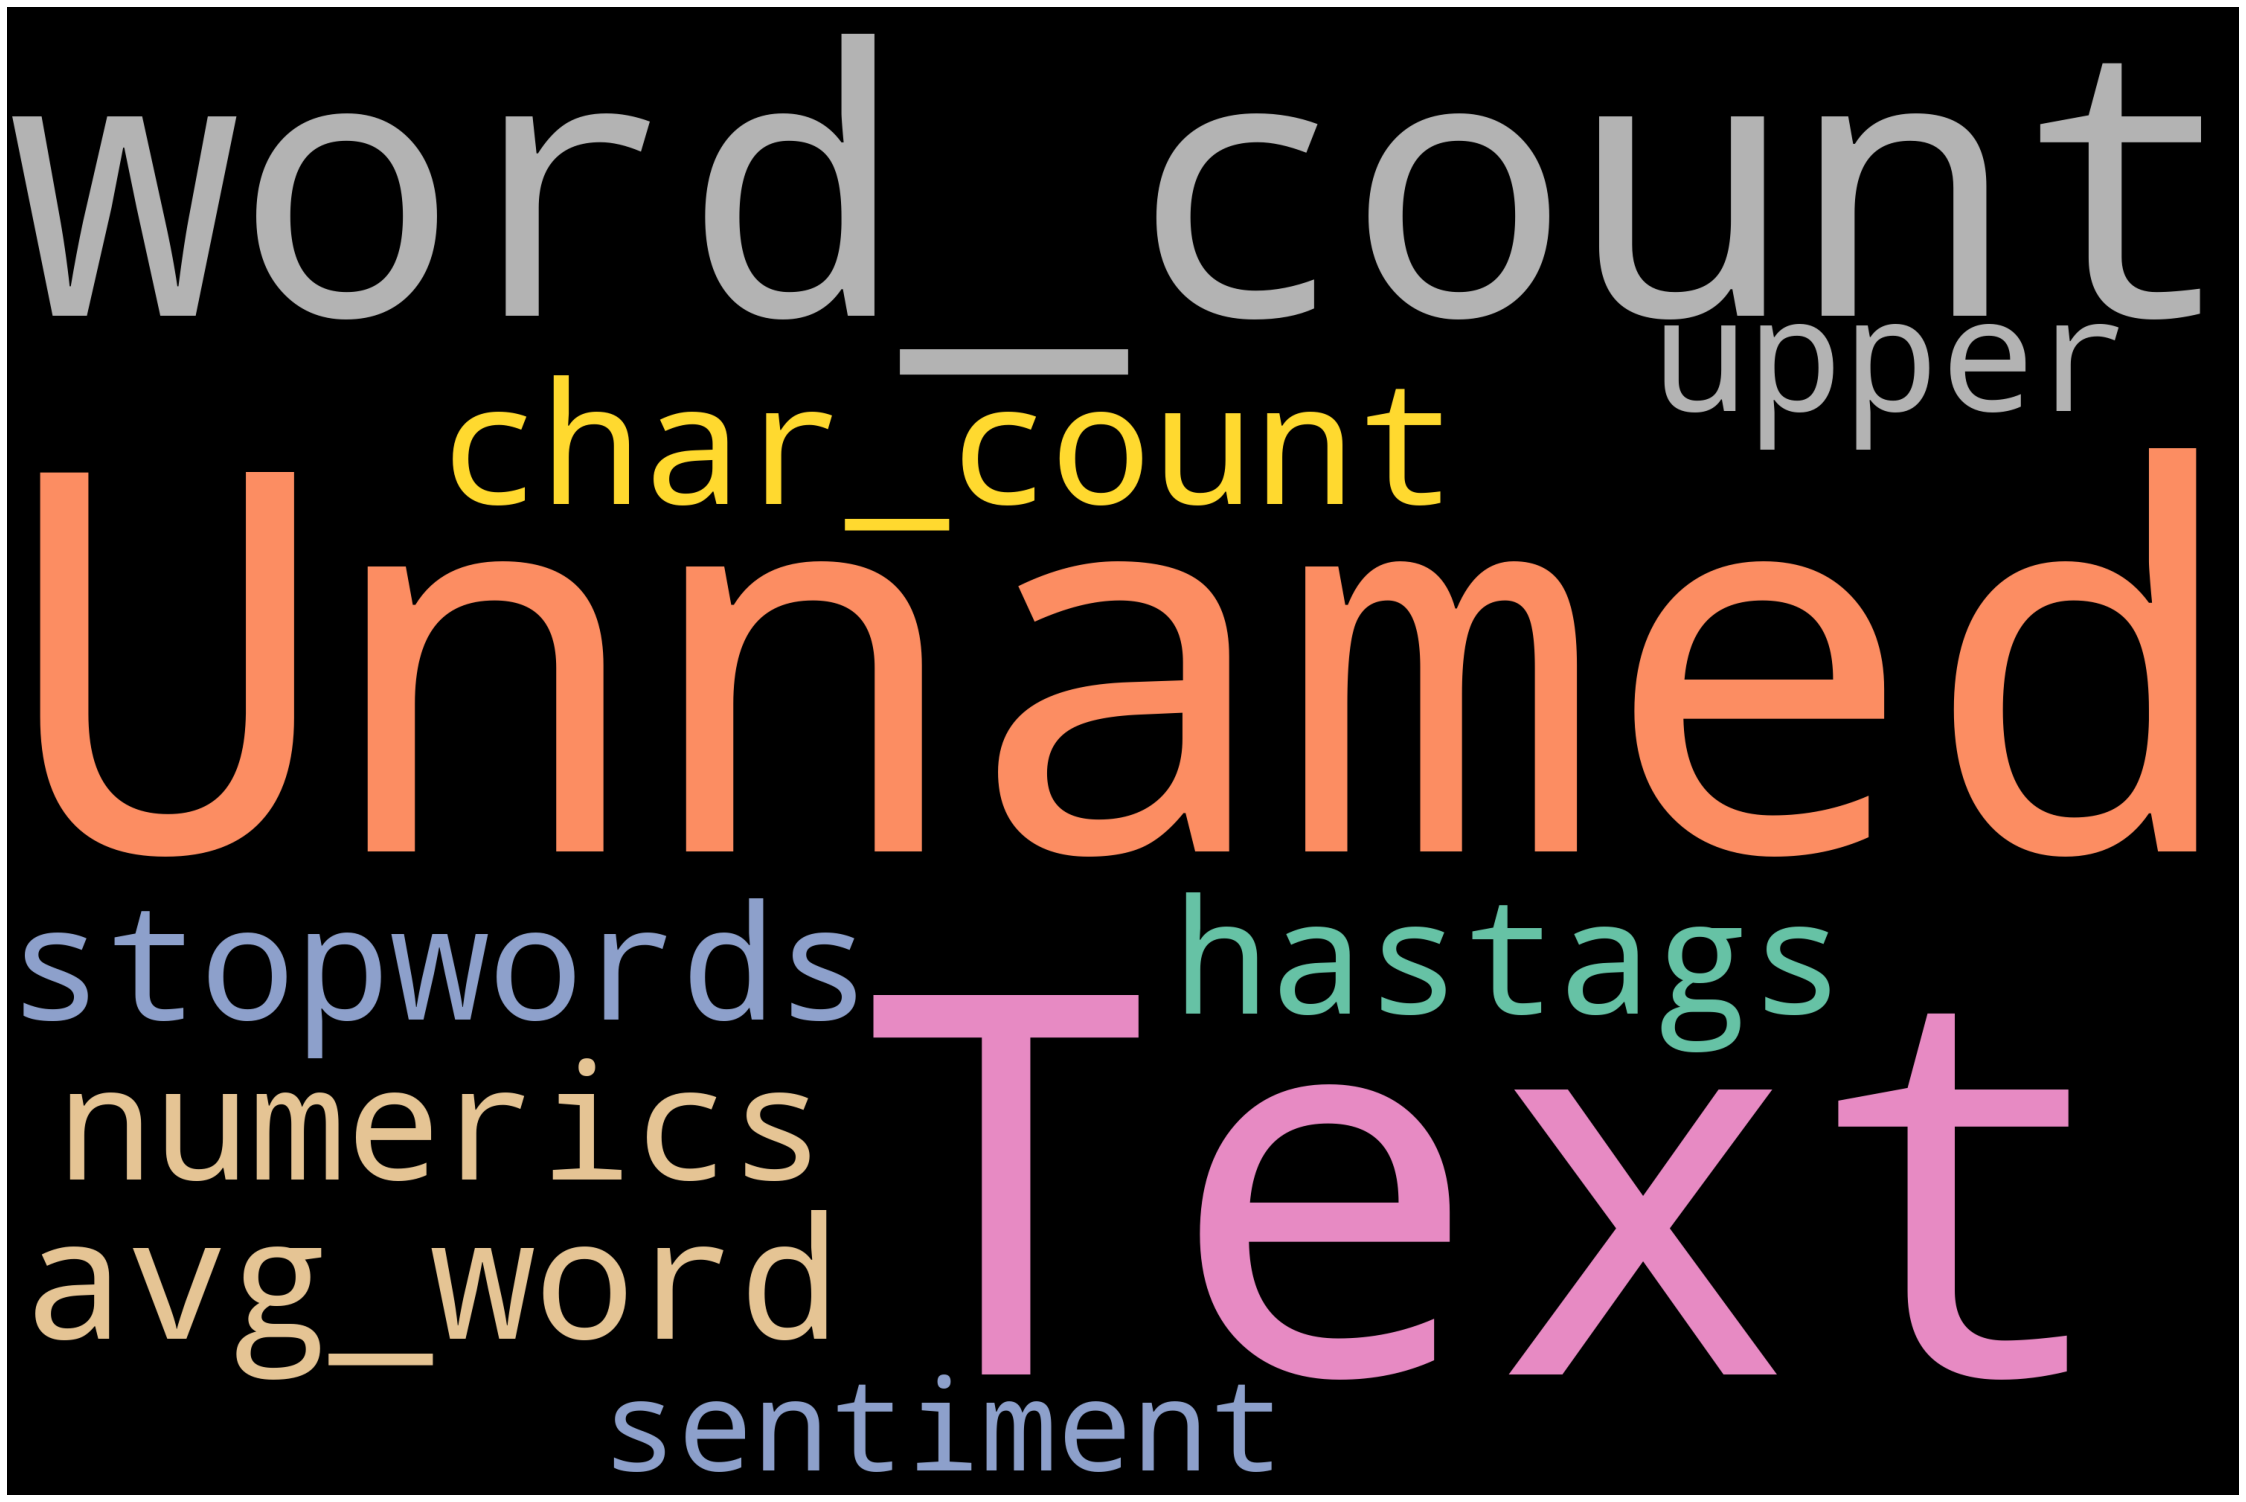

In [53]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)
#Save image
wordcloud.to_file("wordcloud.png")

# Perform Emotion Mining

In [54]:
import codecs
import re
import copy
import collections
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
import matplotlib
    
%matplotlib inline

In [55]:
from __future__ import division
import os
from nltk.corpus import twitter_samples

In [56]:
from nltk.corpus import stopwords

In [57]:
with codecs.open("/content/positive-words.txt", "r", encoding="utf-8") as p:
    pos = p.read()
    print(pos)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expresse

In [58]:
with codecs.open("/content/negative-words.txt", "r", encoding="ISO-8859-1") as n:
    neg = n.read()
    print(neg)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Negative
;
; This file contains a list of NEGATIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expres

In [ ]:
with codecs.open("/content/stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop)

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
apart
appear
appreciate
appropriate
are
aren't
around
as
aside
ask
asking
associated
at
available
away
awfully
b
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
believe
below
beside
besides
best
better
between
beyond
both
brief
but
by
c
c'mon
c's
came
can
can't
cannot
cant
cause
causes
certain
certainly
changes
clearly
co
com
come
comes
concerning
consequently
consider
considering
contain
containing
contains
corresponding
could
couldn't
course
currently
d
definitely
described
despite
did
didn't
different
do
does
doesn't
doing
don't
done
down
downwards
during
e
each
edu
eg
eight
either
else
elsewhere
enough
entirely
especially
et
etc
even
ever
every
everybody
everyone
everything
everywhere
ex
exactly
example

In [59]:
import nltk
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [61]:
from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]

print(tweet_tokens[0])

#FollowFriday


In [ ]:
#############

In [63]:
! pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

In [65]:
no_pages = 2

def get_data(pageNo):  
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    r = requests.get('https://www.amazon.in/gp/bestsellers/books/ref=zg_bs_pg_'+str(pageNo)+'?ie=UTF8&pg='+str(pageNo), headers=headers)#, proxies=proxies)
    content = r.content
    soup = BeautifulSoup(content)
    #print(soup)

    alls = []
    for d in soup.findAll('div', attrs={'class':'a-section a-spacing-none aok-relative'}):
        #print(d)
        name = d.find('span', attrs={'class':'zg-text-center-align'})
        n = name.find_all('img', alt=True)
        #print(n[0]['alt'])
        author = d.find('a', attrs={'class':'a-size-small a-link-child'})
        rating = d.find('span', attrs={'class':'a-icon-alt'})
        users_rated = d.find('a', attrs={'class':'a-size-small a-link-normal'})
        price = d.find('span', attrs={'class':'p13n-sc-price'})

        all1=[]

        if name is not None:
            #print(n[0]['alt'])
            all1.append(n[0]['alt'])
        else:
            all1.append("unknown-product")

        if author is not None:
            #print(author.text)
            all1.append(author.text)
        elif author is None:
            author = d.find('span', attrs={'class':'a-size-small a-color-base'})
            if author is not None:
                all1.append(author.text)
            else:    
                all1.append('0')

        if rating is not None:
            #print(rating.text)
            all1.append(rating.text)
        else:
            all1.append('-1')

        if users_rated is not None:
            #print(price.text)
            all1.append(users_rated.text)
        else:
            all1.append('0')     

        if price is not None:
            #print(price.text)
            all1.append(price.text)
        else:
            all1.append('0')
        alls.append(all1)    
    return alls

In [66]:
results = []
for i in range(1, no_pages+1):
    results.append(get_data(i))
flatten = lambda l: [item for sublist in l for item in sublist]
df = pd.DataFrame(flatten(results),columns=['Book Name','Author','Rating','Customers_Rated', 'Price'])
df.to_csv('amazon_products.csv', index=False, encoding='utf-8')

In [69]:
df = pd.read_csv("https://raw.githubusercontent.com/chidamnat/MKT591/master/Amazon_Products.csv")

In [70]:
df.head()

,prod_id,prod_brand,prod_name,prod_desc,prod_cost,prod_rating,rev_count,prod_url
0,1,Asus,"ASUS ZenFone 2 Unlocked Smartphone, 16GB, Silv...","None 16 GB Silver ASUS, ZenFone2 , Silver, 5.5...",199.0,4.2,1726,http://www.amazon.com/ZenFone-Unlocked-Smartph...
1,2,Asus,"ASUS ZenFone 2 Unlocked Cellphone , 64GB, Silv...","None 64 GB Silver ASUS, ZenFone2 , Sliver, 5.5...",299.0,4.2,1726,http://www.amazon.com/ZenFone-Unlocked-Cellpho...
2,3,Asus,"ASUS ZenFone 2 Unlocked Cellphone, 64GB, Black...","None 64 GB Black ASUS, ZenFone2 , Black, 5.5&#...",299.0,4.2,1726,http://www.amazon.com/ZenFone-Unlocked-Cellpho...
3,4,Asus,"ASUS ZenFone2 Unlocked Smartphone, 16GB, 4GB R...","None 16 GB Black ASUS, ZenFone2 , Black, 5.5&#...",229.0,4.2,1726,http://www.amazon.com/ASUS-ZenFone2-Unlocked-S...
4,5,Asus,"ASUS ZenFone 2 Unlocked Cellphone, 64GB, Red (...","None 64 GB Red ASUS, ZenFone2 , Red, 5.5&#x201...",299.0,4.2,1726,http://www.amazon.com/ASUS-ZenFone-Unlocked-Ce...


In [72]:
df.shape

(1127, 8)

In [73]:
df.head()

,prod_id,prod_brand,prod_name,prod_desc,prod_cost,prod_rating,rev_count,prod_url
0,1,Asus,"ASUS ZenFone 2 Unlocked Smartphone, 16GB, Silv...","None 16 GB Silver ASUS, ZenFone2 , Silver, 5.5...",199.0,4.2,1726,http://www.amazon.com/ZenFone-Unlocked-Smartph...
1,2,Asus,"ASUS ZenFone 2 Unlocked Cellphone , 64GB, Silv...","None 64 GB Silver ASUS, ZenFone2 , Sliver, 5.5...",299.0,4.2,1726,http://www.amazon.com/ZenFone-Unlocked-Cellpho...
2,3,Asus,"ASUS ZenFone 2 Unlocked Cellphone, 64GB, Black...","None 64 GB Black ASUS, ZenFone2 , Black, 5.5&#...",299.0,4.2,1726,http://www.amazon.com/ZenFone-Unlocked-Cellpho...
3,4,Asus,"ASUS ZenFone2 Unlocked Smartphone, 16GB, 4GB R...","None 16 GB Black ASUS, ZenFone2 , Black, 5.5&#...",229.0,4.2,1726,http://www.amazon.com/ASUS-ZenFone2-Unlocked-S...
4,5,Asus,"ASUS ZenFone 2 Unlocked Cellphone, 64GB, Red (...","None 64 GB Red ASUS, ZenFone2 , Red, 5.5&#x201...",299.0,4.2,1726,http://www.amazon.com/ASUS-ZenFone-Unlocked-Ce...


In [74]:
df['prod_rating'] = pd.to_numeric(df['prod_rating'])

In [75]:
df

,prod_id,prod_brand,prod_name,prod_desc,prod_cost,prod_rating,rev_count,prod_url
0,1,Asus,"ASUS ZenFone 2 Unlocked Smartphone, 16GB, Silv...","None 16 GB Silver ASUS, ZenFone2 , Silver, 5.5...",199.0,4.2,1726,http://www.amazon.com/ZenFone-Unlocked-Smartph...
1,2,Asus,"ASUS ZenFone 2 Unlocked Cellphone , 64GB, Silv...","None 64 GB Silver ASUS, ZenFone2 , Sliver, 5.5...",299.0,4.2,1726,http://www.amazon.com/ZenFone-Unlocked-Cellpho...
2,3,Asus,"ASUS ZenFone 2 Unlocked Cellphone, 64GB, Black...","None 64 GB Black ASUS, ZenFone2 , Black, 5.5&#...",299.0,4.2,1726,http://www.amazon.com/ZenFone-Unlocked-Cellpho...
3,4,Asus,"ASUS ZenFone2 Unlocked Smartphone, 16GB, 4GB R...","None 16 GB Black ASUS, ZenFone2 , Black, 5.5&#...",229.0,4.2,1726,http://www.amazon.com/ASUS-ZenFone2-Unlocked-S...
4,5,Asus,"ASUS ZenFone 2 Unlocked Cellphone, 64GB, Red (...","None 64 GB Red ASUS, ZenFone2 , Red, 5.5&#x201...",299.0,4.2,1726,http://www.amazon.com/ASUS-ZenFone-Unlocked-Ce...
...,...,...,...,...,...,...,...,...
1122,1123,Sony,Sony Xperia Z3 L55U 5.2 Inch TFT Capacitive Sc...,None White None None None None None None None ...,-1.0,-1.0,0,http://www.amazon.com/Sony-Z3-L55U-Capacitive-...
1123,1124,Sony,SONY XPERIA Z5 COMPACT E5803 32GB CORAL FACTOR...,None None None None None None None None None N...,-1.0,-1.0,0,http://www.amazon.com/XPERIA-Z5-COMPACT-FACTOR...
1124,1125,Sony,Sony Xperia Z5 E6683 Dual Sim Factory Unlocked...,None gold international model does not work wi...,720.0,-1.0,0,http://www.amazon.com/Sony-E6683-Factory-Unloc...
1125,1126,Sony,Sony Xperia ZL L35h Quad-core 16G ROM 2G RAM 5...,None Black None None None None None None None ...,-1.0,-1.0,0,http://www.amazon.com/Sony-Xperia-Quad-core-Su...


In [76]:
df.dtypes

prod_id          int64
prod_brand      object
prod_name       object
prod_desc       object
prod_cost      float64
prod_rating    float64
rev_count        int64
prod_url        object
dtype: object

In [77]:
df.replace(str(0), np.nan, inplace=True)
df.replace(0, np.nan, inplace=True)

In [78]:
df

,prod_id,prod_brand,prod_name,prod_desc,prod_cost,prod_rating,rev_count,prod_url
0,1,Asus,"ASUS ZenFone 2 Unlocked Smartphone, 16GB, Silv...","None 16 GB Silver ASUS, ZenFone2 , Silver, 5.5...",199.0,4.2,1726.0,http://www.amazon.com/ZenFone-Unlocked-Smartph...
1,2,Asus,"ASUS ZenFone 2 Unlocked Cellphone , 64GB, Silv...","None 64 GB Silver ASUS, ZenFone2 , Sliver, 5.5...",299.0,4.2,1726.0,http://www.amazon.com/ZenFone-Unlocked-Cellpho...
2,3,Asus,"ASUS ZenFone 2 Unlocked Cellphone, 64GB, Black...","None 64 GB Black ASUS, ZenFone2 , Black, 5.5&#...",299.0,4.2,1726.0,http://www.amazon.com/ZenFone-Unlocked-Cellpho...
3,4,Asus,"ASUS ZenFone2 Unlocked Smartphone, 16GB, 4GB R...","None 16 GB Black ASUS, ZenFone2 , Black, 5.5&#...",229.0,4.2,1726.0,http://www.amazon.com/ASUS-ZenFone2-Unlocked-S...
4,5,Asus,"ASUS ZenFone 2 Unlocked Cellphone, 64GB, Red (...","None 64 GB Red ASUS, ZenFone2 , Red, 5.5&#x201...",299.0,4.2,1726.0,http://www.amazon.com/ASUS-ZenFone-Unlocked-Ce...
...,...,...,...,...,...,...,...,...
1122,1123,Sony,Sony Xperia Z3 L55U 5.2 Inch TFT Capacitive Sc...,None White None None None None None None None ...,-1.0,-1.0,NaN,http://www.amazon.com/Sony-Z3-L55U-Capacitive-...
1123,1124,Sony,SONY XPERIA Z5 COMPACT E5803 32GB CORAL FACTOR...,None None None None None None None None None N...,-1.0,-1.0,NaN,http://www.amazon.com/XPERIA-Z5-COMPACT-FACTOR...
1124,1125,Sony,Sony Xperia Z5 E6683 Dual Sim Factory Unlocked...,None gold international model does not work wi...,720.0,-1.0,NaN,http://www.amazon.com/Sony-E6683-Factory-Unloc...
1125,1126,Sony,Sony Xperia ZL L35h Quad-core 16G ROM 2G RAM 5...,None Black None None None None None None None ...,-1.0,-1.0,NaN,http://www.amazon.com/Sony-Xperia-Quad-core-Su...


In [79]:
count_nan = len(df) - df.count()

In [80]:
count_nan

prod_id          0
prod_brand       0
prod_name        0
prod_desc        0
prod_cost        0
prod_rating      0
rev_count      177
prod_url         0
dtype: int64

In [81]:
df = df.dropna()

In [82]:
df

,prod_id,prod_brand,prod_name,prod_desc,prod_cost,prod_rating,rev_count,prod_url
0,1,Asus,"ASUS ZenFone 2 Unlocked Smartphone, 16GB, Silv...","None 16 GB Silver ASUS, ZenFone2 , Silver, 5.5...",199.00,4.2,1726.0,http://www.amazon.com/ZenFone-Unlocked-Smartph...
1,2,Asus,"ASUS ZenFone 2 Unlocked Cellphone , 64GB, Silv...","None 64 GB Silver ASUS, ZenFone2 , Sliver, 5.5...",299.00,4.2,1726.0,http://www.amazon.com/ZenFone-Unlocked-Cellpho...
2,3,Asus,"ASUS ZenFone 2 Unlocked Cellphone, 64GB, Black...","None 64 GB Black ASUS, ZenFone2 , Black, 5.5&#...",299.00,4.2,1726.0,http://www.amazon.com/ZenFone-Unlocked-Cellpho...
3,4,Asus,"ASUS ZenFone2 Unlocked Smartphone, 16GB, 4GB R...","None 16 GB Black ASUS, ZenFone2 , Black, 5.5&#...",229.00,4.2,1726.0,http://www.amazon.com/ASUS-ZenFone2-Unlocked-S...
4,5,Asus,"ASUS ZenFone 2 Unlocked Cellphone, 64GB, Red (...","None 64 GB Red ASUS, ZenFone2 , Red, 5.5&#x201...",299.00,4.2,1726.0,http://www.amazon.com/ASUS-ZenFone-Unlocked-Ce...
...,...,...,...,...,...,...,...,...
1099,1100,Sony,"Sony Xperia E C1605 Dual Sim, 3MP, 3G, 4GB, Ic...",Sony Xperia E dual is an affordable and compac...,170.00,3.5,4.0,http://www.amazon.com/Sony-C1605-Sandwich-Fact...
1100,1101,Sony,Sony Ericsson K850i (UNLOCKED),5-megapixel power The K850i Cyber-shot. phone ...,-1.00,4.5,4.0,http://www.amazon.com/Sony-K850i-Ericsson-UNLO...
1101,1102,Sony,Sony Ericsson W580i Unlocked Quadband Phone (B...,"The W580i is a sleek, slim, street-style slide...",-1.00,3.0,18.0,http://www.amazon.com/Sony-Ericsson-W580i-Unlo...
1102,1103,Sony,Sony Ericsson Aspen Smartphone White Silver Un...,Sony Ericsson Aspen,-1.00,3.0,1.0,http://www.amazon.com/Sony-Ericsson-Smartphone...


In [83]:
data = df.sort_values(["prod_cost"], axis=0, ascending=False)[:15]

In [84]:
data

,prod_id,prod_brand,prod_name,prod_desc,prod_cost,prod_rating,rev_count,prod_url
50,50,Apple,Apple iPhone 6s Plus 64 GB US Domestic Warrant...,"None Rose Gold 64 GB &#xE002; WITH 3D TOUCH, L...",999.00,4.2,22.0,http://www.amazon.com/Apple-Domestic-Warranty-...
41,42,Apple,Apple iPhone 6s 128 GB US Domestic Warranty Un...,None Rose Gold 128 GB None None None None None...,994.95,4.3,40.0,http://www.amazon.com/Apple-Domestic-Warranty-...
760,756,Huawei,Huawei Mate S Unlocked Smartphone 5.5 Inch His...,None Gold None None None None None None None N...,985.00,3.4,6.0,http://www.amazon.com/Huawei-Mate-Unlocked-Sma...
283,279,Apple,Pre-Order Apple iPhone 6S (4.7&quot;) 64GB Fac...,None None None,964.13,5.0,1.0,http://www.amazon.com/Pre-Order-Apple-iPhone-F...
79,80,Apple,Apple iPhone 6s 128 GB US Domestic Warranty Un...,None Silver 128 GB None None Iphone 6s with 12...,956.73,4.3,40.0,http://www.amazon.com/Apple-Domestic-Warranty-...
198,193,Apple,Apple iPhone 6s Plus 16 GB US Domestic Warrant...,None Silver 16 GB None None None None None Non...,948.00,4.1,21.0,http://www.amazon.com/Apple-Domestic-Warranty-...
36,37,Apple,Apple iPhone 6s 128 GB US Domestic Warranty Un...,None Space Gray 128 GB None None None None Non...,940.00,4.3,40.0,http://www.amazon.com/Apple-Domestic-Warranty-...
125,124,Apple,Apple iPhone 6 128GB (4.7-inch) 4G LTE Factory...,None Silver 128 GB Built on 64-bit desktop-cla...,929.00,4.6,1232.0,http://www.amazon.com/Apple-4-7-inch-Unlocked-...
226,223,Apple,2015 Newest Apple iPhone 6s 4.7 inch 4G LTE GS...,None 64GB Rose Gold The moment you use iPhone ...,929.00,5.0,1.0,http://www.amazon.com/Apple-Unlocked-Smartphon...
142,141,Apple,Apple iPhone 6s 128 GB US Domestic Warranty Un...,None Gold 128 GB None None None None None None...,920.00,4.3,40.0,http://www.amazon.com/Pre-Order-Apple-iPhone-F...


In [85]:
from bokeh.models import ColumnDataSource
from bokeh.transform import dodge
import math
from bokeh.io import curdoc
curdoc().clear()
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.models import Legend
output_notebook()

In [86]:
p = figure(x_range=data.iloc[:,1], plot_width=800, plot_height=550, title="Authors Highest Priced Book", toolbar_location=None, tools="")

p.vbar(x=data.iloc[:,1], top=data.iloc[:,4], width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = math.pi/2

In [87]:
p

Figure(id='1002', ...)

In [88]:
data = df[df['prod_cost'] > 500]

In [89]:
data

,prod_id,prod_brand,prod_name,prod_desc,prod_cost,prod_rating,rev_count,prod_url
21,22,Apple,"Apple iPhone 6S Factory Sealed Unlocked Phone,...",None Gold 64 GB None None Iphone 6s with 64GB ...,844.00,4.3,40.0,http://www.amazon.com/Apple-iPhone-6S-Factory-...
24,25,Apple,Apple iPhone 6 16GB (4.7-inch) 4G LTE Factory ...,None Gold 16 GB Built on 64-bit desktop-class ...,639.99,4.6,1232.0,http://www.amazon.com/Apple-4-7-inch-Unlocked-...
25,26,Apple,Apple iPhone 6s 64 GB US Domestic Warranty Unl...,None Rose Gold 64 GB Item is in new factory se...,869.99,4.3,40.0,http://www.amazon.com/Apple-Domestic-Warranty-...
26,27,Apple,Apple iPhone 6 16GB 4G LTE Unlocked GSM Cell P...,None Space Grey 16 GB Built on 64-bit desktop-...,621.50,4.6,1232.0,http://www.amazon.com/Apple-iPhone-16GB-Unlock...
29,30,Apple,"Apple iPhone 6, Silver, 16 GB (Unlocked)",None Silver 16 GB None None Display None None ...,634.00,4.6,1232.0,http://www.amazon.com/Apple-iPhone-Silver-16-U...
...,...,...,...,...,...,...,...,...
1042,1039,Samsung,Samsung Galaxy Note 5 DUOS N9208 32GB Gold Pla...,"Original, Brand New Samsung Galaxy Note 5 DUOS...",749.00,4.8,4.0,http://www.amazon.com/Samsung-N9208-Platinum-F...
1053,1049,Samsung,Samsung Galaxy S6 G920a 32GB Unlocked GSM 4G L...,None Black Sapphire The GALAXY S6 embodies inc...,520.35,4.8,13.0,http://www.amazon.com/Samsung-Unlocked-Octa-Co...
1071,1072,Sony,"Sony Xperia Z2 SGP521 Factory Unlocked Tablet,...",SPECIFICATION GENERAL 2G Network GSM 850 / 900...,599.00,4.6,19.0,http://www.amazon.com/Sony-Factory-Unlocked-In...
1075,1076,Sony,Sony Xperia Z1 (C6902) Purple Unlocked US Version,None Purple &nbsp;,623.43,4.6,51.0,http://www.amazon.com/Sony-Xperia-Z1-Purple-Un...


In [90]:
data = data.sort_values(['prod_rating'],axis=0, ascending=False)[:15]
data

,prod_id,prod_brand,prod_name,prod_desc,prod_cost,prod_rating,rev_count,prod_url
306,300,Apple,2015 Newest Apple iPhone 6s 4.7 inch 4G LTE GS...,"None 64GB Gold The moment you use iPhone 6s, y...",919.00,5.0,1.0,http://www.amazon.com/Apple-Smartphone-Interna...
338,336,Apple,Apple iPhone 6 Plus 64GB Unlocked Smartphone -...,None 64GB Silver Built on 64-bit desktop-class...,749.99,5.0,2.0,http://www.amazon.com/Apple-iPhone-Plus-Unlock...
343,340,Apple,Apple iPhone 6 Plus Space Gray 64GB Unlocked S...,None 64GB Space Gray What's in the box: Certif...,749.99,5.0,2.0,http://www.amazon.com/Apple-Unlocked-Smartphon...
332,330,Apple,Apple iPhone 6 Plus Silver 128GB Unlocked Smar...,None 128GB Silver What's in the box: Certified...,799.99,5.0,2.0,http://www.amazon.com/Apple-Unlocked-Smartphon...
274,270,Apple,2015 Newest Apple iPhone 6s 4.7 inch 4G LTE GS...,"None 64GB Silver The moment you use iPhone 6s,...",919.00,5.0,1.0,http://www.amazon.com/Apple-Smartphone-Interna...
303,297,Apple,Apple iPhone 6 Plus Space Gray 16GB Unlocked S...,None 16GB Space Gray What's in the box: Certif...,679.99,5.0,2.0,http://www.amazon.com/Apple-Unlocked-Smartphon...
687,680,Huawei,Huawei P8 GRA-UL10&nbsp;EMUI 3.1 with 5.2 Inch...,None Gold None None Basic Information None Non...,518.50,5.0,2.0,http://www.amazon.com/Huawei-GRA-UL10%C2%A0EMU...
178,175,Apple,Apple iPhone 6s 64GB - Rose Gold/ Factory Unlo...,Hi everyone I just got this phone from Verizon...,865.00,5.0,1.0,http://www.amazon.com/Apple-iPhone-6s-64GB-Int...
693,688,Huawei,Original HUAWEI Asend P8 64G Android 5.0 Unloc...,None Gold None None None None None None None N...,664.00,5.0,1.0,http://www.amazon.com/Original-HUAWEI-Asend-An...
1038,1035,Samsung,Samsung Galaxy Note 5 N920G 32GB Factory Unloc...,None Silver Bigger has always been better. Gal...,693.65,5.0,2.0,http://www.amazon.com/Samsung-Galaxy-N920G-Fac...


In [91]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(df))
sentences[5:15]

[]

In [92]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,prod_id prod_brand prod_name prod_desc prod_co...


In [93]:
from bokeh.transform import factor_cmap
from bokeh.models import Legend
from bokeh.palettes import Dark2_5 as palette
import itertools
from bokeh.palettes import d3
#colors has a list of colors which can be used in plots
colors = itertools.cycle(palette)

palette = d3['Category20'][20]

In [94]:
palette

('#1f77b4',
 '#aec7e8',
 '#ff7f0e',
 '#ffbb78',
 '#2ca02c',
 '#98df8a',
 '#d62728',
 '#ff9896',
 '#9467bd',
 '#c5b0d5',
 '#8c564b',
 '#c49c94',
 '#e377c2',
 '#f7b6d2',
 '#7f7f7f',
 '#c7c7c7',
 '#bcbd22',
 '#dbdb8d',
 '#17becf',
 '#9edae5')

In [95]:
colors

In [96]:
index_cmap = factor_cmap('prod_brand', palette=palette,
                         factors=data["prod_brand"])
p = figure(plot_width=700, plot_height=700, title = "Top Authors: Rating vs. Customers Rated")
p.scatter('Rating','Customers_Rated',source=data,fill_alpha=0.6, fill_color=index_cmap,size=20,legend='Author')
p.xaxis.axis_label = 'RATING'
p.yaxis.axis_label = 'CUSTOMERS RATED'
p.legend.location = 'top_left'

In [97]:
show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "x" value "Rating", key "y" value "Customers_Rated" [renderer: GlyphRenderer(id='1067', ...)]
